# day 83 and day 84

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# model building

In [3]:
x = df.drop('Churn',axis=1)
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


# converting all non numerical values into numerical values

In [4]:
x = pd.get_dummies(x,drop_first=True)
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1
7028,0,72,103.20,7362.90,0,0,0,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7029,0,11,29.60,346.45,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7030,1,4,74.40,306.60,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [5]:
y = df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

# basic svc

In [6]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=101)


# model building

from sklearn.svm import SVC

svc = SVC()

# from sklearn.model_selection import GridSearchCV

# param_grid = {'C':[0.01,0.1,0.5,1,2],'kernel':['linear','poly','rbf','sigmoid','precomputed'],'degree':[3,6],
#               'gamma':['scale','auto',1,2,10]}

# grid = GridSearchCV(estimator=svc, param_grid=param_grid)

# grid.fit(x_train,y_train)

svc.fit(x_train,y_train)

actual = y_test
prediction = svc.predict(x_test)

In [15]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [7]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

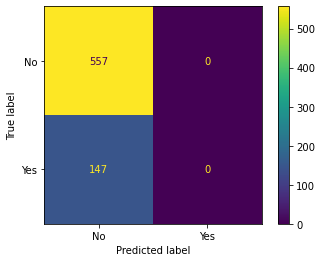

In [9]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svc,x_test,y_test)

In [10]:
accuracy_score(actual,prediction)

0.7911931818181818

In [11]:
print(classification_report(actual,prediction))

              precision    recall  f1-score   support

          No       0.79      1.00      0.88       557
         Yes       0.00      0.00      0.00       147

    accuracy                           0.79       704
   macro avg       0.40      0.50      0.44       704
weighted avg       0.63      0.79      0.70       704



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# conclusion:

This is called shitty prediction. 

# Trying a Stochastic Gradient Descent classifier.

Remember Gradient descent works like searching for an apple in a dark room by groping and sensing all objects around while keeping the path in memory until we get to the apple. note this algorithm gets the computer reach its target without having literal eyes to see. 

In [17]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

# from sklearn.model_selection import GridSearchCV

# param_grid = {'loss':['hinge','log','squared_hinge','perceptron'],'penalty':['l2','l1','elasticnet'],
#               'alpha':[0.0001,0.01,0.1,0.5,1],'fit_intercept':[True,False]}

# grid = GridSearchCV(sgd,param_grid,cv=3)

sgd.fit(x_train,y_train)

prediction = sgd.predict(x_test)

actual = y_test

In [13]:
help(SGDClassifier())

Help on SGDClassifier in module sklearn.linear_model._stochastic_gradient object:

class SGDClassifier(BaseSGDClassifier)
 |  SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
 |  
 |  Linear classifiers (SVM, logistic regression, etc.) with SGD training.
 |  
 |  This estimator implements regularized linear models with stochastic
 |  gradient descent (SGD) learning: the gradient of the loss is estimated
 |  each sample at a time and the model is updated along the way with a
 |  decreasing strength schedule (aka learning rate). SGD allows minibatch
 |  (online/out-of-core) learning via the `partial_fit` method.
 |  For best results using the default learning rate schedule, the data sh

In [6]:
def show(model,x_test,y_test,actual,prediction):
    
    # importing the essentials
    from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
    
    # accuracy score
    print('accuracy_score is: ',accuracy_score(actual,prediction))
    
    # Confusion matrix plot
    ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)
    plt.show()
    
    # classification_report
    print(classification_report(actual,prediction))

0.8167613636363636


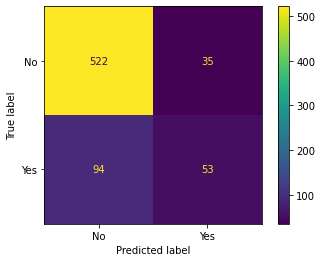

              precision    recall  f1-score   support

          No       0.85      0.94      0.89       557
         Yes       0.60      0.36      0.45       147

    accuracy                           0.82       704
   macro avg       0.72      0.65      0.67       704
weighted avg       0.80      0.82      0.80       704



In [20]:
show(sgd,x_test,y_test,actual,prediction)

# trying with decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV


param_grid = {'criterion':['gini','entropy'],'max_features':['auto','log2']}

grid = GridSearchCV(dtc,param_grid)

grid.fit(x_train,y_train)

actual = y_test
prediction = grid.predict(x_test)

In [22]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_

In [37]:
features = grid.best_estimator_.feature_importances_
important = pd.DataFrame(data=features,index=x.columns,columns=['important features'])

important = important[important['important features'] > 0.01]

important = important.sort_values('important features',ascending=False)

important

,important features
TotalCharges,0.152317
tenure,0.077391
MonthlyCharges,0.062133
InternetService_No,0.055268
OnlineSecurity_Yes,0.025464
PaperlessBilling_Yes,0.019465
InternetService_Fiber optic,0.019150
PaymentMethod_Electronic check,0.018629
gender_Male,0.018215
StreamingMovies_Yes,0.015422


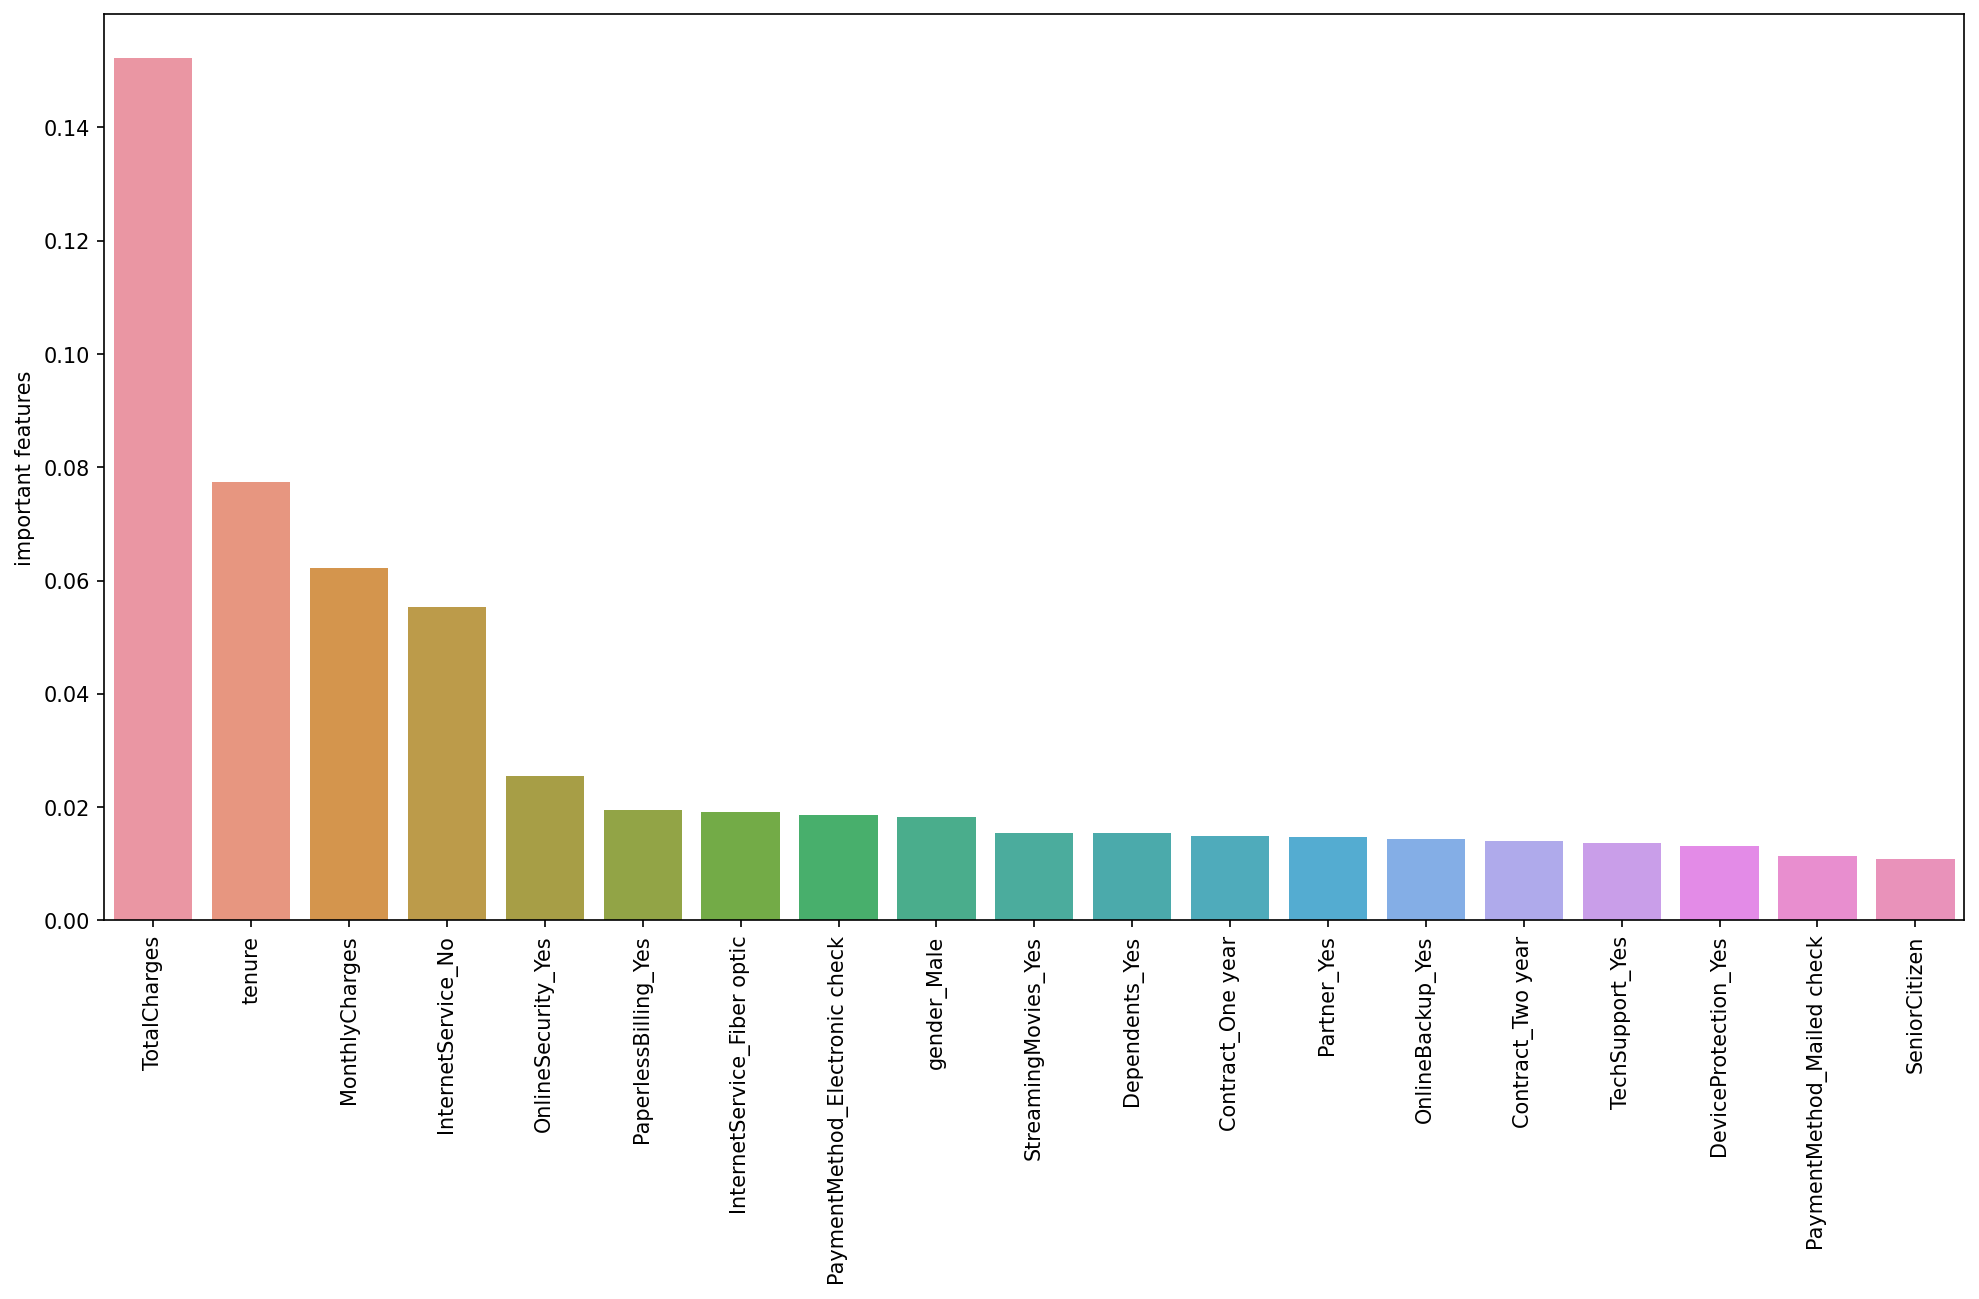

In [39]:

plt.figure(figsize=(16,8),dpi=150)
sns.barplot(data=important, x=important.index,y='important features')

plt.xticks(rotation=90)

plt.show()


In [42]:
grid.best_params_

{'criterion': 'entropy', 'max_features': 'auto'}

accuracy_score is:  0.7613636363636364


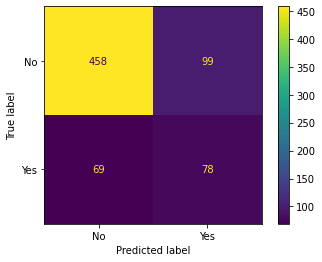

              precision    recall  f1-score   support

          No       0.87      0.82      0.85       557
         Yes       0.44      0.53      0.48       147

    accuracy                           0.76       704
   macro avg       0.65      0.68      0.66       704
weighted avg       0.78      0.76      0.77       704



In [43]:
show(grid,x_test,y_test,actual,prediction)

# trying with decision tree boosting methods.

# gradient boost

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=101)



In [20]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(n_estimators=128)

# from sklearn.model_selection import RandomizedSearchCV



# param_grid = {'loss':['deviance','exponential'],'learning_rate':[0.1,0.3,0.5],'n_estimators':[5,10,50,100,128,200]}

# r = RandomizedSearchCV(gbc,param_grid)

gbc.fit(x_train,y_train)

actual = y_test
prediction = gbc.predict(x_test)

In [11]:
help(gbc)

Help on GradientBoostingClassifier in module sklearn.ensemble._gb object:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is i

accuracy_score is:  0.8252840909090909


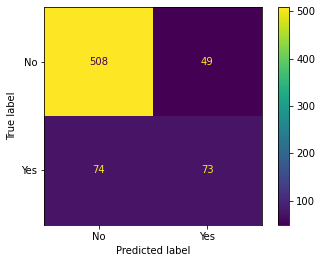

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.60      0.50      0.54       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



In [21]:
show(gbc,x_test,y_test,actual,prediction)